In [1]:
!pip install -U scikit-learn scipy matplotlib
!pip install certifi


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.layers import Dropout
from keras.regularizers import l2
print(tf.__version__)

2.16.1


Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


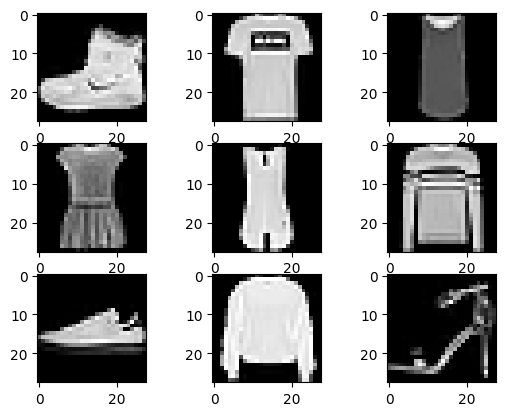

In [3]:
# example of loading the fashion mnist dataset
# load dataset
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
 # define subplot
 pyplot.subplot(330 + 1 + i)
 # plot raw pixel data
 pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [4]:
# load train and test dataset
def load_dataset():
 # load dataset
 (trainX, trainY), (testX, testY) = fashion_mnist.load_data()
 # reshape dataset to have a single channel
 trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
 testX = testX.reshape((testX.shape[0], 28, 28, 1))
 # one hot encode target values
 trainY = to_categorical(trainY)
 testY = to_categorical(testY)
 return trainX, trainY, testX, testY


In [5]:
# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

In [6]:
# define cnn model
def define_model_v1():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(learning_rate=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model


In [7]:
# define cnn model
def define_model＿v2():
    model = Sequential()
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_initializer='he_uniform'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [8]:
# define cnn model
def define_model＿v3():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', kernel_initializer='he_uniform', 
                     kernel_regularizer=l2(0.001), input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [9]:

def define_model_v4():
    model = Sequential()
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_initializer='he_uniform', 
                     kernel_regularizer=l2(0.001), input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.001)))
    model.add(Dense(10, activation='softmax'))
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [10]:

def define_model_v5():
    model = Sequential()
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_initializer='he_uniform',
                    kernel_regularizer=l2(0.001), input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.2))  
    model.add(Dense(10, activation='softmax'))
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [11]:
def define_model_overfitting():
    model = Sequential()
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_initializer='he_uniform', 
                     input_shape=(28, 28, 1)))
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu', kernel_initializer='he_uniform'))
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu', kernel_initializer='he_uniform'))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [12]:
def define_model_final_VII():
    model = Sequential()
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_initializer='he_uniform', 
                     kernel_regularizer=l2(0.001),  input_shape=(28, 28, 1)))
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_initializer='he_uniform', 
                     kernel_regularizer=l2(0.001)))    
    model.add(MaxPooling2D((3, 3), strides=(2,2)))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [13]:
def define_model_final_VIII():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', kernel_initializer='he_uniform', 
                     kernel_regularizer=l2(0.01),  input_shape=(28, 28, 1)))
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', kernel_initializer='he_uniform', 
                     kernel_regularizer=l2(0.01)))    
    model.add(MaxPooling2D((3, 3), strides=(2,2)))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [14]:
def evaluate_model(dataX, dataY, model_type, n_folds=5):

    scores, histories = list(), list()
    # prepare cross validation
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    # enumerate splits
    for train_ix, test_ix in kfold.split(dataX):

        # define model
        if(model_type == 1):
            model = define_model_v1()
        elif(model_type == 2):
            model = define_model＿v2()  
        elif(model_type == 3):
            model = define_model＿v3()
        elif(model_type == 4):
            model = define_model_v4()
        elif(model_type == 5):
            model = define_model_v5()
        elif(model_type == 6):
            model = define_model_overfitting()
        elif(model_type == 7):
            model = define_model_final_VII()
        elif(model_type == 8):
            model = define_model_final_VIII()
            
        # select rows for train and test
        trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
        # fit model
        history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
        # evaluate model
        _, acc = model.evaluate(testX, testY, verbose=0)
        print('> %.3f' % (acc * 100.0))
        # append scores
        scores.append(acc)
        histories.append(history)
    return scores, histories


In [15]:
# plot diagnostic learning curves
def summarize_diagnostics(histories):
	for i in range(len(histories)):
		# plot loss
		pyplot.subplot(211)
		pyplot.title('Cross Entropy Loss')
		pyplot.plot(histories[i].history['loss'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
		# plot accuracy
		pyplot.subplot(212)
		pyplot.title('Classification Accuracy')
		pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='test')
	pyplot.show()


In [16]:
# summarize model performance
def summarize_performance(scores):
	# print summary
	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
	# box and whisker plots of results
	pyplot.boxplot(scores)
	pyplot.show()

In [17]:
def run_test_harness(model_type):
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# evaluate model
	scores, histories = evaluate_model(trainX, trainY, model_type)
	# learning curves
	summarize_diagnostics(histories)
	# summarize estimated performance
	summarize_performance(scores)

# entry point, run the test harness


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


> 90.800
> 90.650
> 90.808
> 91.125
> 90.100


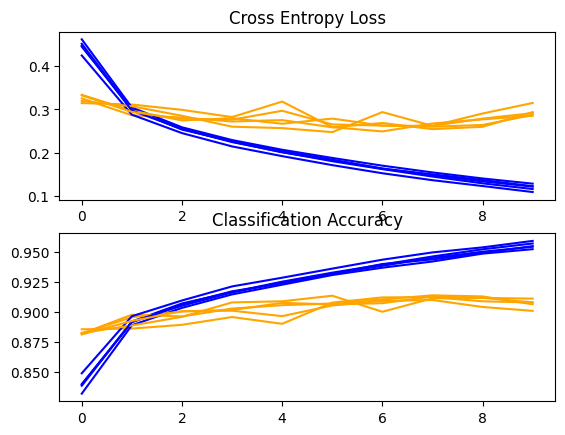

Accuracy: mean=90.697 std=0.336, n=5


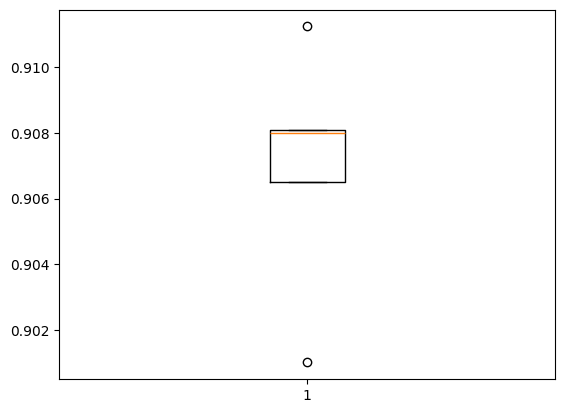

In [17]:
run_test_harness(1)

> 90.592
> 91.150
> 91.383
> 90.900
> 90.675


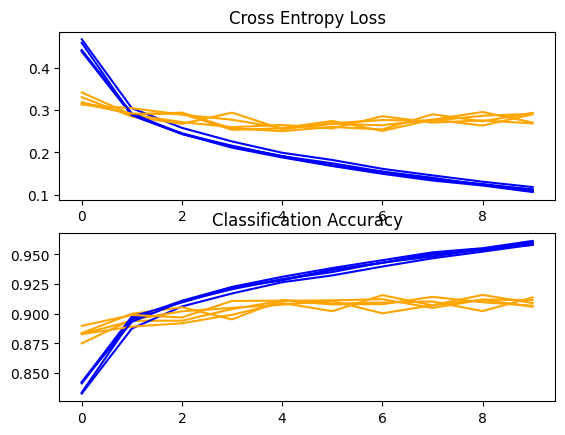

Accuracy: mean=90.940 std=0.295, n=5


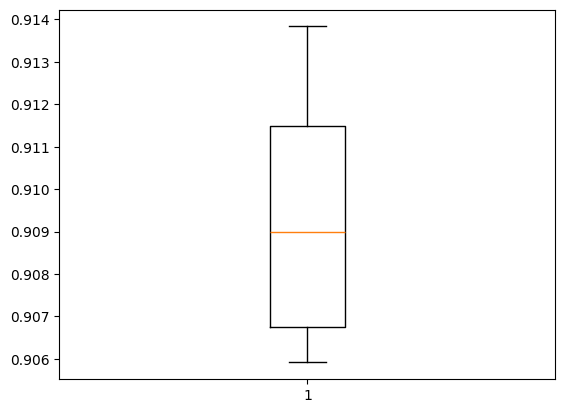

In [18]:
run_test_harness(2)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


> 90.075
> 91.142
> 90.467
> 91.117
> 91.042


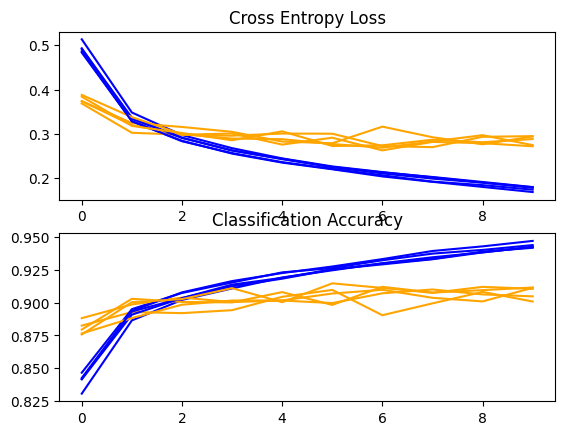

Accuracy: mean=90.768 std=0.426, n=5


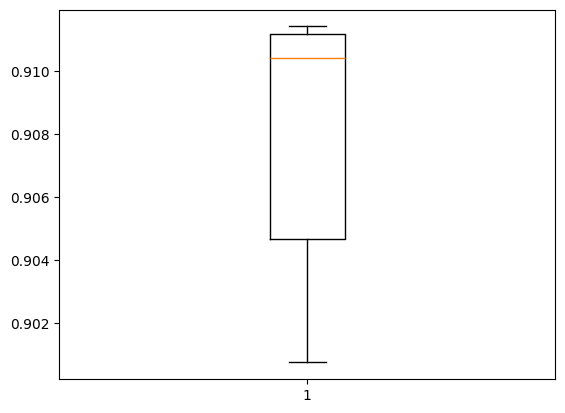

In [19]:
run_test_harness(3)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


> 90.917
> 90.100
> 89.242
> 90.283
> 90.750


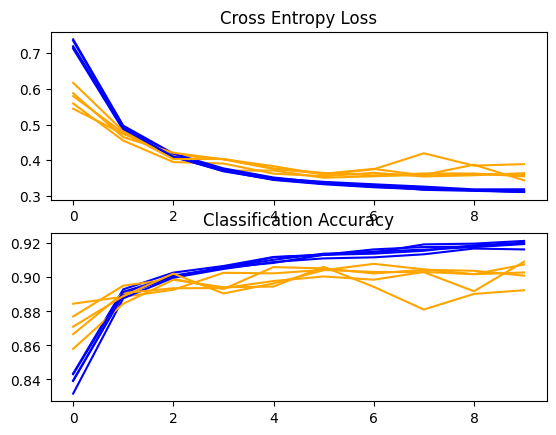

Accuracy: mean=90.258 std=0.589, n=5


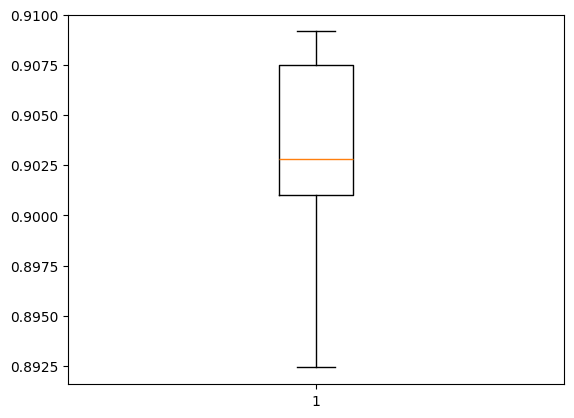

In [20]:
run_test_harness(4)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


> 88.375
> 90.417
> 90.292
> 90.242
> 90.125


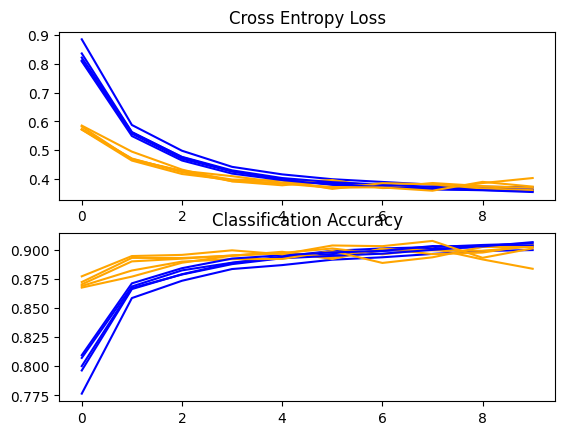

Accuracy: mean=89.890 std=0.763, n=5


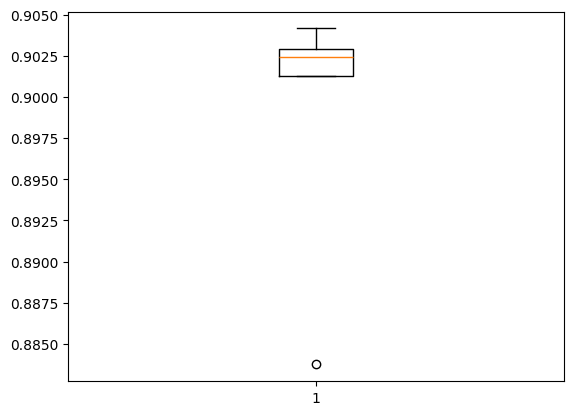

In [21]:
run_test_harness(5)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


> 91.367
> 91.658
> 91.483
> 91.575
> 91.900


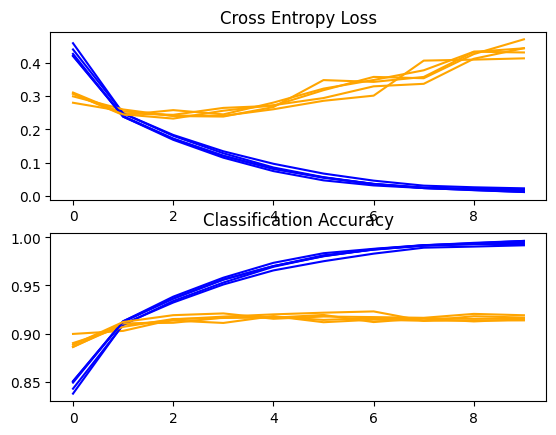

Accuracy: mean=91.597 std=0.180, n=5


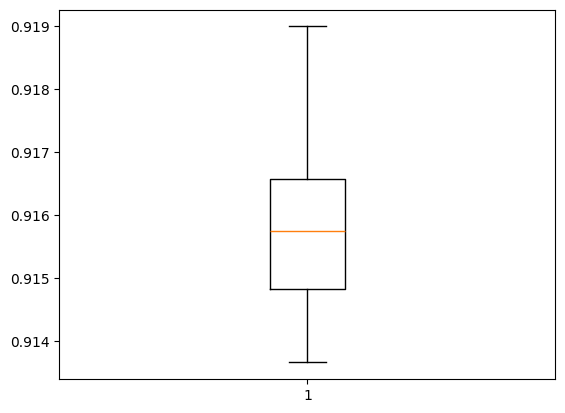

In [22]:
run_test_harness(6) 
# overfitting

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


> 91.092
> 91.233
> 91.308
> 91.392
> 90.975


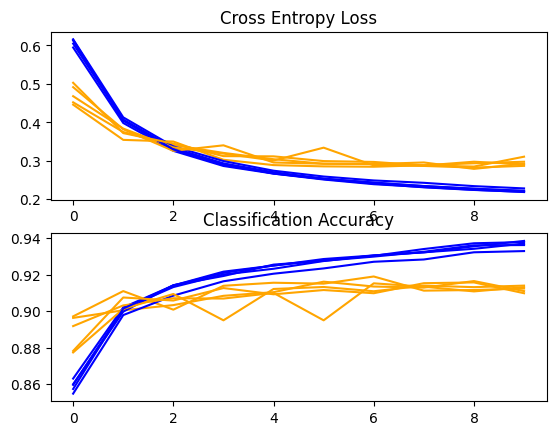

Accuracy: mean=91.200 std=0.150, n=5


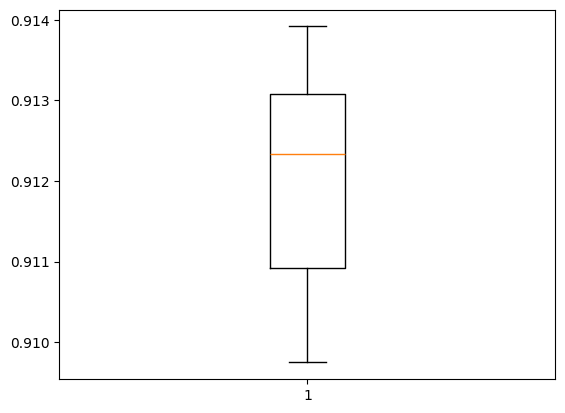

In [29]:
run_test_harness(7)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


> 90.608
> 91.217
> 90.925
> 91.033
> 90.767


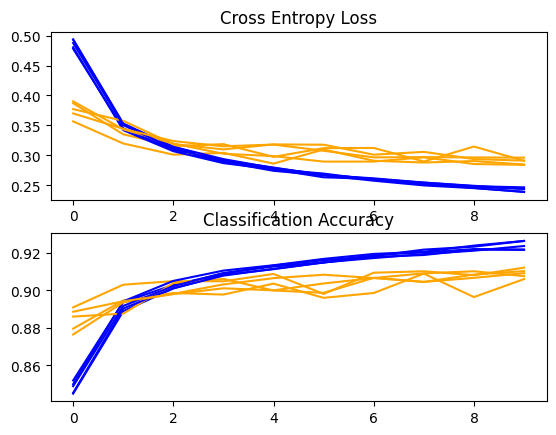

Accuracy: mean=90.910 std=0.210, n=5


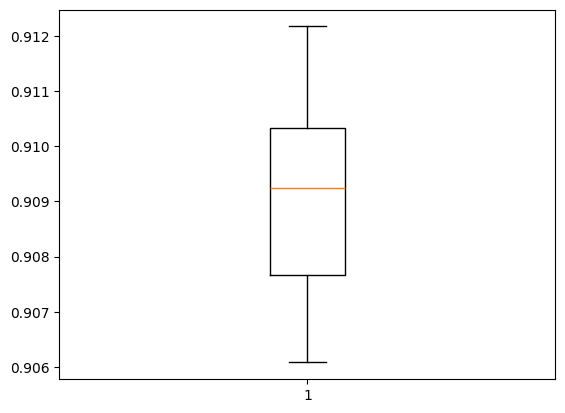

In [36]:
run_test_harness(8)

In [22]:
print(define_model_v1())


<Sequential name=sequential, built=True>


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
